<h1>A glance at Tensorflow basics</h1>

[  9.99999998e-01   2.06115362e-09   6.91440009e-13]


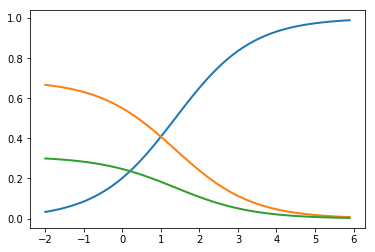

In [33]:
import matplotlib
matplotlib.use('MacOSX')

scores = [30,10,2] 

def softmax(x):
    
    return np.exp(x) / np.sum(np.exp(x),axis=0)

    
print(softmax(scores))


import matplotlib.pyplot as plt

x = np.arange(-2.0,6.0,0.1)
scores = np.vstack([x, np.ones_like(x),0.2 * np.ones_like(x)])
plt.plot(x, softmax(scores).T,linewidth=2)
plt.show()

In [34]:
import tensorflow as tf
import numpy as np

In [35]:
x = tf.constant([[1.0, 2], [3, 4]])
x2=tf.norm(x,axis=1)
y = tf.matmul(x,x)

In [36]:
g = tf.get_default_graph()


In [37]:
sess = tf.Session()

# Now we tell our session to compute anything we've created in the tensorflow graph.
computed_x,com_y = sess.run([x2,y])

In [38]:
computed_x

array([ 2.23606801,  5.        ], dtype=float32)

In [39]:
print(x)

Tensor("Const_2:0", shape=(2, 2), dtype=float32)


In [40]:
x1 = tf.Variable(tf.truncated_normal([10,10]))

In [41]:
g = tf.get_default_graph()

In [42]:
sess = tf.Session()


In [43]:
%matplotlib inline
import matplotlib.pyplot as plt

In [44]:
from skimage import data
img = data.camera()

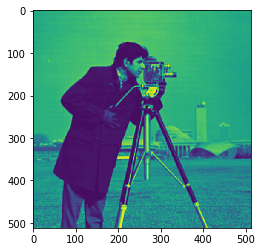

In [16]:
plt.imshow(img)

In [17]:
import os
import matplotlib.colors as colors
import matplotlib.cm as cmx

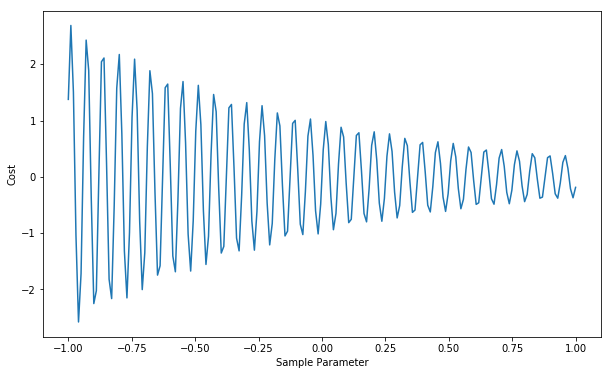

In [18]:
fig = plt.figure(figsize=(10,6))
ax=fig.gca()
x = np.linspace(-1,1,200)
hz =100
cost = np.sin(hz*x)*np.exp(-x)
ax.plot(x, cost)
ax.set_ylabel('Cost')
ax.set_xlabel('Sample Parameter')
plt.show()

In [19]:
gradient = np.diff(cost)

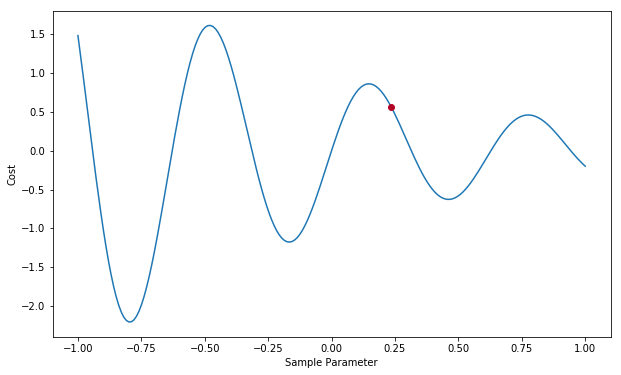

In [20]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca()
x = np.linspace(-1, 1, 200)
hz = 10
cost = np.sin(hz*x)*np.exp(-x)
ax.plot(x, cost)
ax.set_ylabel('Cost')
ax.set_xlabel('Sample Parameter')
n_iterations = 500


cmap = plt.get_cmap('coolwarm')
c_norm = colors.Normalize(vmin=0, vmax=n_iterations)
scalar_map = cmx.ScalarMappable(norm=c_norm, cmap=cmap)
init_p=120
learning_rate = 1.0
for iter_i in range(n_iterations):
    init_p -= learning_rate * gradient[int(round(init_p))]
    ax.plot(x[int(round(init_p))], cost[int(round(init_p))], 'ro', alpha=(iter_i + 1) / n_iterations, color=scalar_map.to_rgba(iter_i))

In [21]:
round(init_p)

123.0

In [22]:
gradient

array([ 1.31302478, -1.18388577, -2.54348727, -1.53936319,  0.85897256,
        2.42045456,  1.7272222 , -0.53899223, -2.264944  , -1.87577408,
        0.22890145,  2.0814054 ,  1.9848839 ,  0.06679532, -1.87448764,
       -2.0550712 , -0.34409315,  1.64895077,  2.08746313,  0.59952308,
       -1.40958152, -2.08374048, -0.83017765,  1.16111324,  2.04607766,
        1.03372565, -0.90815145, -1.97707822, -1.20841666,  0.65510583,
        1.87970706,  1.35307572, -0.40612937, -1.75722063, -1.46708893,
        0.16506532,  1.61309654,  1.55038071,  0.06459767, -1.45096359,
       -1.60338346, -0.279762  ,  1.27453343,  1.62700083,  0.47774901,
       -1.08753489, -1.62256529, -0.65631838,  0.89365181,  1.59179119,
        0.81367919, -0.69646534, -1.5367243 , -0.94849299,  0.49940118,
        1.45968892,  1.05986926, -0.3056826 , -1.36323345, -1.14735381,
        0.11828936,  1.25007549,  1.21091066,  0.06007683, -1.12304743,
       -1.25089818, -0.22702031,  0.98504325,  1.26804012,  0.38

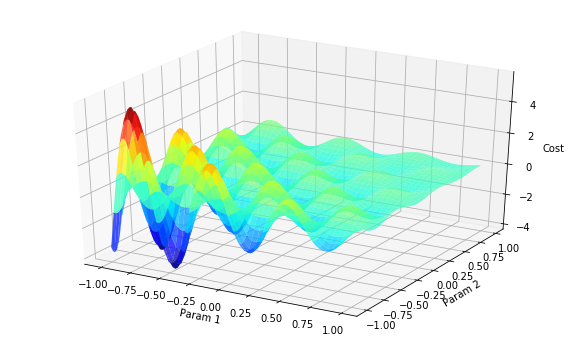

In [23]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
x, y = np.mgrid[-1:1:0.02, -1:1:0.02]
X, Y, Z = x, y, np.sin(hz*x)*np.exp(-x)*np.cos(hz*y)*np.exp(-y)
ax.plot_surface(X, Y, Z, rstride=2, cstride=2, alpha=0.75, cmap='jet', shade=False)
ax.set_xlabel('Param 1')
ax.set_ylabel('Param 2')
ax.set_zlabel('Cost')


IndexError: index -257 is out of bounds for axis 0 with size 200

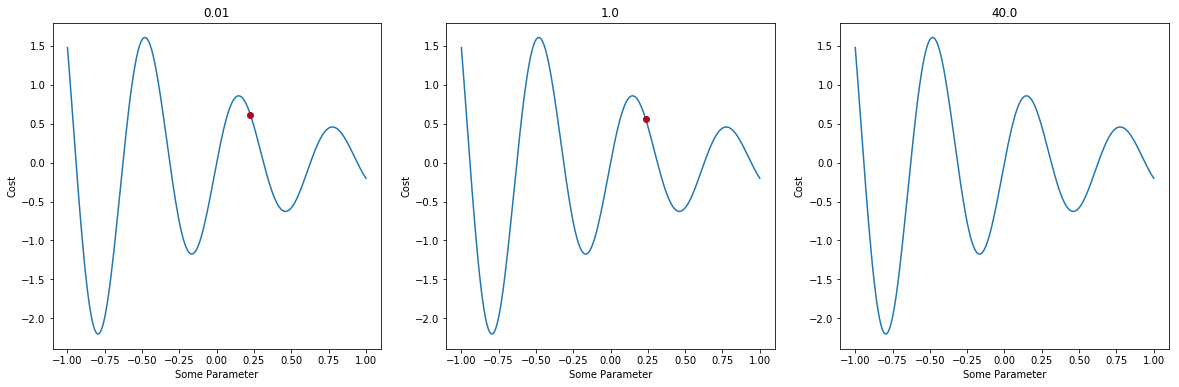

In [24]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
for rate_i, learning_rate in enumerate([0.01, 1.0, 40.0]):
    ax = axs[rate_i]
    x = np.linspace(-1, 1, 200)
    hz = 10
    cost = np.sin(hz*x)*np.exp(-x)
    ax.plot(x, cost)
    ax.set_ylabel('Cost')
    ax.set_xlabel('Some Parameter')
    ax.set_title(str(learning_rate))
    n_iterations = 500
    cmap = plt.get_cmap('coolwarm')
    c_norm = colors.Normalize(vmin=0, vmax=n_iterations)
    scalar_map = cmx.ScalarMappable(norm=c_norm, cmap=cmap)
    init_p = 120#np.random.randint(len(x)*0.2, len(x)*0.8)
    for iter_i in range(n_iterations):
        init_p -= learning_rate * gradient[int(round(init_p))]
        ax.plot(x[int(round(init_p))], cost[int(round(init_p))], 'ro', alpha=(iter_i + 1) / n_iterations, color=scalar_map.to_rgba(iter_i))

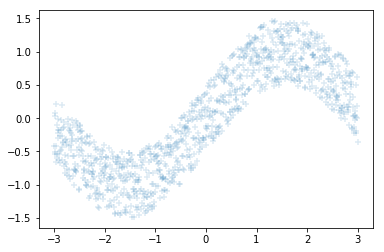

In [25]:
n_observations = 1000

xs = np.linspace(-3, 3, n_observations)

ys = np.sin(xs) + np.random.uniform(-0.5, 0.5, n_observations)
plt.scatter(xs, ys, alpha=0.15, marker='+')

(array([  10.,   44.,  126.,  225.,  246.,  190.,  105.,   39.,   12.,    3.]),
 array([-2.7953918 , -2.16100705, -1.5266223 , -0.89223754, -0.25785279,
         0.37653196,  1.01091671,  1.64530146,  2.27968621,  2.91407096,
         3.54845572]),
 <a list of 10 Patch objects>)

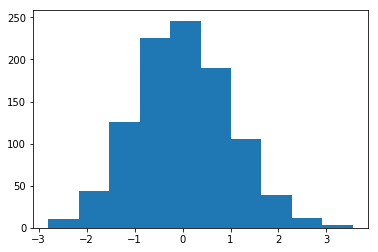

In [26]:
#xvals placeholder
X = tf.placeholder(tf.float32,name='X')
Y = tf.placeholder(tf.float32,name='Y')

session= tf.InteractiveSession()
n = tf.random_normal([1000]).eval()
plt.hist(n)

In [27]:
W = tf.Variable(tf.random_normal([1],stddev=0.1,dtype=tf.float32),name='weight')
B = tf.Variable(tf.constant(0.0, shape=[1]),name='bias')
Y_pred = X * W + B

In [28]:
def distance(p1, p2):
    return tf.abs(p1 - p2)

In [29]:
cost = tf.reduce_mean(distance(Y_pred, Y))

In [30]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

0.890472
0.677011
0.529989
0.458778
0.42822
0.413502
0.407336
0.404572
0.40327
0.402616
0.402446
0.4024
0.402379
0.402364


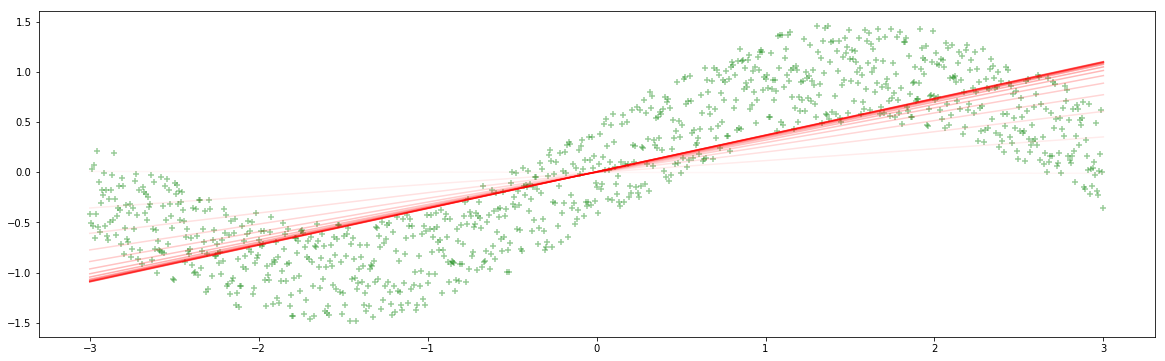

In [53]:
n_iterations=500
fig,ax = plt.subplots(1,1,figsize=(20, 6))
ax.scatter(xs,ys,alpha=0.4,marker='+',color='g')

with tf.Session() as session:
    tf.global_variables_initializer().run()
    #session.run(tf.initialize_all_variables())
    prev_training_cost=0.0
    for iter_i in range(n_iterations):
        session.run(optimizer,feed_dict={X:xs,Y:ys})
        training_cost = session.run(cost, feed_dict={X: xs, Y: ys})
        if iter_i % 10 == 0:
            ys_pred = Y_pred.eval(feed_dict={X: xs})
            ax.plot(xs, ys_pred, 'r', alpha=iter_i * 2.0 / n_iterations)
            fig.show()
            plt.draw()
            print(training_cost)
        if np.abs(prev_training_cost - training_cost) < 0.000001:
            break
        prev_training_cost = training_cost

## Try Image Repainting



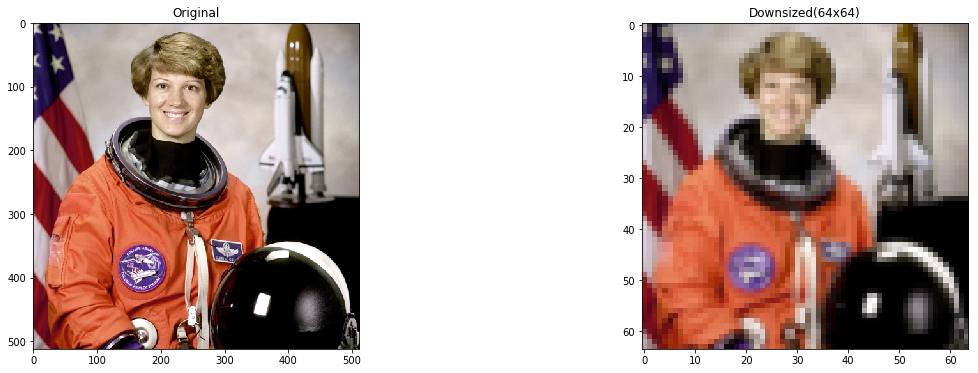

In [73]:
from skimage.data import astronaut
from scipy.misc import imresize
original_img = astronaut() # imresize(astronaut(), (64, 64))
img = imresize(astronaut(), (64, 64))
fig,ax = plt.subplots(1,2,figsize=(20, 6))

plt.subplot(1,2,1)
plt.imshow(original_img)
plt.title('Original')

plt.subplot(1,2,2)
plt.imshow(img)
plt.title('Downsized(64x64)')

In [69]:
xs=[]
ys=[]

for row_i in range(img.shape[0]):
    for col_i in range(img.shape[1]):
        # And store the inputs
        xs.append([row_i, col_i])
        # And outputs that the network needs to learn to predict
        ys.append(img[row_i, col_i])

In [75]:
xs=np.array(xs)
ys=np.array(ys)
xs= (xs-np.mean(xs))/np.std(xs)
xs.shape, ys.shape

((4096, 2), (4096, 3))

In [78]:
def linear(X, n_input, n_output, activation=None, scope=None):
    with tf.variable_scope(scope or "linear"):
        W = tf.get_variable(
            name='W',
            shape=[n_input, n_output],
            initializer=tf.random_normal_initializer(mean=0.0, stddev=0.1))
        b = tf.get_variable(
            name='b',
            shape=[n_output],
            initializer=tf.constant_initializer())
        h = tf.matmul(X, W) + b
        if activation is not None:
            h = activation(h)
        return h

In [82]:
X = tf.placeholder(shape=[None,2],dtype=tf.float32,name='X')
Y = tf.placeholder(shape=[None,3],dtype=tf.float32,name='Y')

n_neurons = [2, 64, 64, 64, 64, 64, 64, 3]

current_input = X
for layer_i in range(1, len(n_neurons)):
    current_input = linear(
        X=current_input,
        n_input=n_neurons[layer_i - 1],
        n_output=n_neurons[layer_i],
        activation=tf.nn.relu if (layer_i+1) < len(n_neurons) else None,
        scope='layer_1_' + str(layer_i))
Y_pred = current_input


cost = tf.reduce_mean(
    tf.reduce_sum(distance(Y_pred, Y), 1))

optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)


(49, 138.71823)


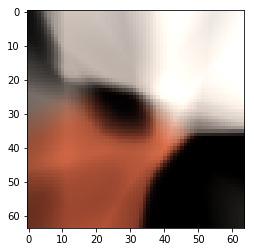

(99, 88.523544)


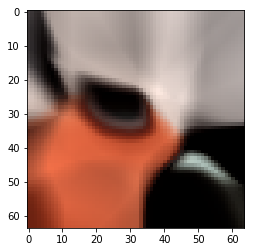

(149, 88.662575)


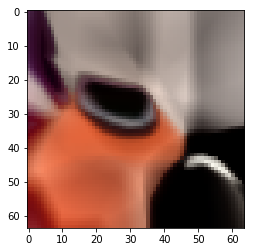

(199, 79.044525)


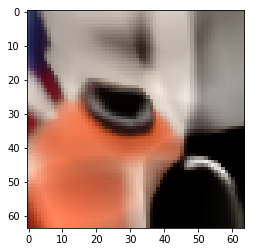

(249, 85.660507)


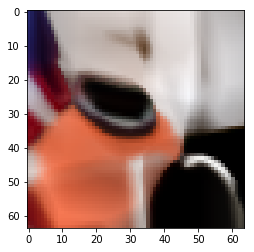

(299, 63.885605)


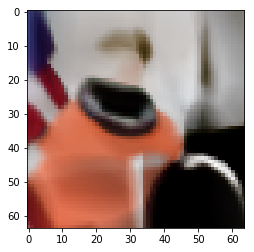

(349, 61.623379)


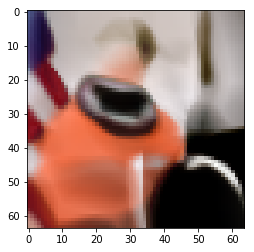

(399, 74.189865)


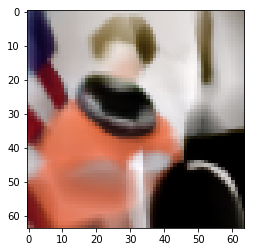

(449, 61.590752)


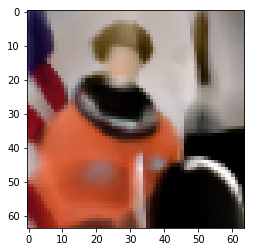

(499, 52.846584)


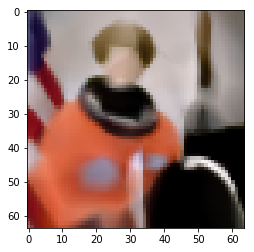

In [86]:
n_iterations = 500
batch_size=50
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    prev_training_cost=0.0
    for it_i in range(n_iterations):
        idxs = np.random.permutation(range(len(xs)))
        n_batches = len(idxs) // batch_size
        for batch_i in range(n_batches):
            idxs_i = idxs[batch_i* n_batches:(batch_i+1)*n_batches]
            sess.run(optimizer,feed_dict={X:xs[idxs_i],Y:ys[idxs_i]})
        training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})
        
        if (it_i + 1) % 50 == 0:
            print(it_i, training_cost)
            ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)
            fig, ax = plt.subplots(1, 1)
            img = np.clip(ys_pred.reshape(img.shape), 0, 255).astype(np.uint8)
            plt.imshow(img)
            plt.show()